Reading /data/lixiang/mem-pattern-recognition/new_bench/parse.res...
['health', 'namd_r_base.prefetch-m64', 'ldecod_r_base.prefetch-m64', 'radiosity', 'zeusmp_base.prefetch-riscv', 'cpuxalan_r_base.prefetch-m64', 'radix', 'power', 'treeadd', 'bh']
Our Method 93.74605922064839 51.6031418158633
51.6031418158633 ldecod_r_base.prefetch-m64 cpuxalan_r_base.prefetch-m64
['cpugcc_r_base.prefetch-m64', 'mst', 'seq-list', 'povray_r_base.prefetch-m64', 'GemsFDTD_base.prefetch-riscv', 'dc.A.x', 'deepsjeng_r_base.prefetch-m64', 'gobmk_base.prefetch-riscv', 'volrend', 'hmmer_base.prefetch-riscv', 'zeusmp_base.prefetch-riscv', 'em3d', 'soplex_base.prefetch-riscv', 'tsp', 'gromacs_base.prefetch-riscv', 'sp.A.x']
random 77.71313061319962 0.03686054937192429
0.03686054937192429 GemsFDTD_base.prefetch-riscv zeusmp_base.prefetch-riscv
['raytrace', 'cpuxalan_r_base.prefetch-m64', 'xz_r_base.prefetch-m64', 'radix', 'tsp', 'gobmk_base.prefetch-riscv', 'power', 'lu_cb', 'namd_r_base.prefetch-m64', 'fft', 'dc

/usr/local/lib64/python3.6/site-packages/sklearn/utils/validation.py:73: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)
/usr/local/lib64/python3.6/site-packages/sklearn/utils/validation.py:73: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)


['water_nsquared', 'mcf_r_base.prefetch-m64', 'lbm_r_base.prefetch-m64', 'gromacs_base.prefetch-riscv', 'povray_r_base.prefetch-m64', 'is.A.x', 'cam4_r_base.prefetch-m64', 'gobmk_base.prefetch-riscv', 'volrend', 'health', 'barnes', 'seq-list', 'bh', 'power', 'deepsjeng_r_base.prefetch-m64', 'mst']
cluster 1-A 84.47823330030022 29.48547644745799
29.48547644745799 water_nsquared barnes


/usr/local/lib64/python3.6/site-packages/sklearn/utils/validation.py:73: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)
/usr/local/lib64/python3.6/site-packages/sklearn/utils/validation.py:73: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)


['h264ref_base.prefetch-riscv', 'is.A.x', 'nab_r_base.prefetch-m64', 'bwaves_r_base.prefetch-m64', 'cpugcc_r_base.prefetch-m64', 'mcf_r_base.prefetch-m64', 'volrend', 'ep.A.x', 'deepsjeng_r_base.prefetch-m64', 'health', 'ocean_ncp', 'cg.A.x', 'mst', 'radiosity']
cluster 2-A 87.26782700461871 0.0
0.0 mst radiosity


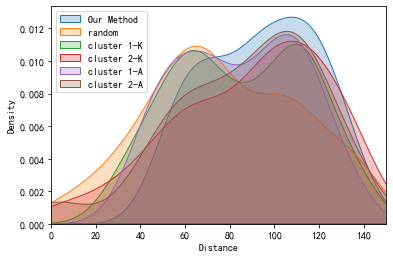

In [3]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import math
import numpy as np
from random import sample, choice
from sklearn.cluster import AgglomerativeClustering, KMeans #, BisectingKMeans
import statsmodels.api as sm
import seaborn as sns
K = 16
N = 65
file = "parse.res"
# if sys.argc != 1:
#     print("Usage: ./cluster.py result_file")
#     exit()
# file = sys.argv[1]
if not os.path.isabs(file):
    file = os.path.join(os.getcwd(), file)
print(f"Reading {file}...")

content = open(file)
app = []
X = []
for line in content.readlines():
    tmp = line.strip().split(',')
    app.append(tmp[0])
    tmp = [t[:-1] for t in tmp[1:]]
    X.append(tmp)
X = X[:N]
app = app[:N]


def dist(X, Y):
    sum = 0
    for i in range(len(X)):
        sum = sum+(float(X[i])-float(Y[i]))*(float(X[i])-float(Y[i]))
    if sum < 0:
        print(X)
        print(Y)
    return math.sqrt(sum)


def BuildGraph(limit):
    edges = pd.DataFrame(columns=['sources', 'targets'])
    N = len(X)
    for i in range(N):
        for j in range(i+1, N):
            if dist(X[i], X[j]) <= limit:
                # print(app[i]+","+app[j])
                edges = edges.append(
                    {'sources': app[i], 'targets': app[j]}, ignore_index=True)
                edges = edges.append(
                    {'sources': app[j], 'targets': app[i]}, ignore_index=True)
    # print(edges)
    G = nx.from_pandas_edgelist(edges, source='sources', target='targets')
    for ap in app:
        if ap not in G.nodes:
            G.add_node(ap)
    return G


fig, ax = plt.subplots()
x = np.linspace(0, 35)
draw_cdf = False


def Paint(G, name="a"):
    global ax, x, ans, draw_cdf
    ans = ans[:K]
    print(ans)
    m = len(ans)
    result = []
    nowmin=100000
    for i in range(m):
        di = 0
        for ii in range(N):
            if app[ii] == ans[i]:
                di = ii
                break
        for j in range(i+1, m):
            dj = 0
            for jj in range(N):
                if app[jj] == ans[j]:
                    dj = jj
                    break
            result.append(dist(X[di], X[dj]))
            if dist(X[di], X[dj])<nowmin:
                nowmin=dist(X[di], X[dj])
                nowminx=app[di]
                nowminy=app[dj]
    if draw_cdf:
        sns.ecdfplot([i/100.0 for i in result], label=name, ax=ax)
        # ecdf=sm.distributions.ECDF(result)
        # # x=np.linspace(min(result),max(result))
        # y=ecdf(x)
        # # plt.step(x,y)
        # ax.step(x, y, label=name)
        # # plt.savefig(f'{name}.png')
        # # plt.clf()
    else:
        # result.sort()
        # print(result)
        sns.kdeplot([i/100.0 for i in result], label=name, shade=True, ax=ax)
    print(name,sum(result)/len(result),min(result))
    print(nowmin,nowminx,nowminy)

    # color_map = ['red' if node in ans else 'green' for node in G]
    # nx.draw(G,with_labels=True,pos=nx.kamada_kawai_layout(G),node_color=color_map)
    # plt.savefig(f'{name}.png')
    # plt.clf()


def check(limit):
    G = BuildGraph(limit)
    global ans
    ans = nx.maximal_independent_set(G)
    # Paint(G,"paint/"+str(limit))
    Paint(G, "Our Method")
    return len(ans) >= K


def check_random(limit):
    G = BuildGraph(limit)
    global ans
    ans = sample(app, K)
    # Paint(G,"paint/"+str(limit)+"_random")
    Paint(G, "random")


def check_cluster(limit, clu_algo='A'):
    G = BuildGraph(limit)
    global ans
    ans = []
    if clu_algo is 'A':
        clf = AgglomerativeClustering(n_clusters=K)
    elif clu_algo is 'K':
        clf = KMeans(n_clusters=K)
    elif clu_algo is 'K2':
        clf = BisectingKMeans(n_clusters=K)
    clf.fit(X, app)
    y = clf.fit_predict(X)
    for k in range(K):
        now_app = []
        for i in range(N):
            if y[i] == k:
                now_app.append(app[i])
        if len(now_app) > 0:
            ans.append(choice(now_app))
    # Paint(G,"paint/"+str(limit)+"_cluster")
    Paint(G, "cluster 1-"+clu_algo)


def check_cluster_2(limit, clu_algo='A'):
    G = BuildGraph(limit)
    global ans
    ans = []
    if clu_algo is 'A':
        clf = AgglomerativeClustering(n_clusters=K//2)
    elif clu_algo is 'K':
        clf = KMeans(n_clusters=K//2)
    elif clu_algo is 'K2':
        clf = BisectingKMeans(n_clusters=K//2)
    clf.fit(X, app)
    y = clf.fit_predict(X)
    for k in range(K):
        now_app = []
        for i in range(N):
            if y[i] == k:
                now_app.append(app[i])
        # ans.append(choice(now_app))
        if len(now_app) > 1:
            ans.extend(sample(now_app, 2))
    # Paint(G,"paint/"+str(limit)+"_cluster")
    Paint(G, "cluster 2-"+clu_algo)


# LL=40.75765625
LL = 50
check(LL)
check_random(LL)
for clu_algo in ['K', 'A']:
    check_cluster(LL, clu_algo)
    check_cluster_2(LL, clu_algo)

fig.show()
if draw_cdf:
    ylabel='CDF'
    ax.set_ylabel(ylabel)
else:
    ylabel='Density'
    ax.set_ylabel(ylabel)
ax.set_xlabel('Distance')
ax.set_xlim(left=0, right=150)
ax.legend(loc="upper left")
fig.savefig(ylabel+".pdf",format='pdf',dpi=600)

# T=2
# Ans=0
# Offset=0.1
# L=0
# R=1000
# while L<=R:
#     M=(L+R)/2.0
#     if check(M):
#         Ans=M
#         L=M+1
#     else:
#         R=M-1

# for t in range(T):
#     L=0
#     R=9
#     now=0
#     while L<=R:
#         M=(L+R)/2.0
#         if check(Ans+Offset*M):
#             now=M
#             L=M+1
#         else:
#             R=M-1
#     Ans=Ans+Offset*now
#     Offset=Offset*0.1

# print(Ans)
# G=BuildGraph(Ans)
# Paint(G)


In [11]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import math
import numpy as np
from random import sample, choice
from sklearn.cluster import AgglomerativeClustering
import statsmodels.api as sm
K=10
N=65
file="/data/lixiang/mem-pattern-recognition/new_bench/parse.res"
# if sys.argc != 1:
#     print("Usage: ./cluster.py result_file")
#     exit()
# file = sys.argv[1]
if not os.path.isabs(file):
    file = os.path.join(os.getcwd(), file)
print(f"Reading {file}...")

content = open(file)
app = []
X = []
for line in content.readlines():
    tmp = line.strip().split(',')
    app.append(tmp[0])
    tmp=[t[:-1] for t in tmp[1:]]
    X.append(tmp)
X=X[:N]
app=app[:N]


def dist(X,Y):
    sum=0
    for i in range(len(X)):
        a=float(X[i])-float(Y[i])
        if a<0:
            sum=sum-a
        else:
            sum=sum+a
        # sum=(float(X[i])-float(Y[i]))*(float(X[i])-float(Y[i]))
    # return math.sqrt(sum)
    return sum

def dist2(X,Y):
    sum=0
    for i in range(len(X)):
        sum=sum+(float(X[i])-float(Y[i]))*(float(X[i])-float(Y[i]))
    return math.sqrt(sum)

N=len(X)
limit=0
for i in range(N):
    for j in range(i+1,N):
        if dist(X[i],X[j])>limit and float(X[i][0])<10 and float(X[j][0])<10 and float(X[i][2])<80 and float(X[j][2])<80 and float(X[i][3])<50 and float(X[j][3])<50:
            limit=dist(X[i],X[j])
            ans1,ans2=i,j

print(limit)
print(ans1,ans2)
print(X[ans1])
print(X[ans2])
print(dist2(X[ans1],X[ans2]))
print(app[ans1],app[ans2])


Reading /data/lixiang/mem-pattern-recognition/new_bench/parse.res...
200.00799537000006
55 57
['0.01851', '33.84', '38.63', '6.061', '2.966', '0', '0', '1.324', '0', '17.17']
['0.001495', '0', '0', '0', '1.963e-05', '100', '0', '0', '0', '0']
113.92768507288055
xz_r_base.prefetch-m64 tsp
